## Develop Hough Transform

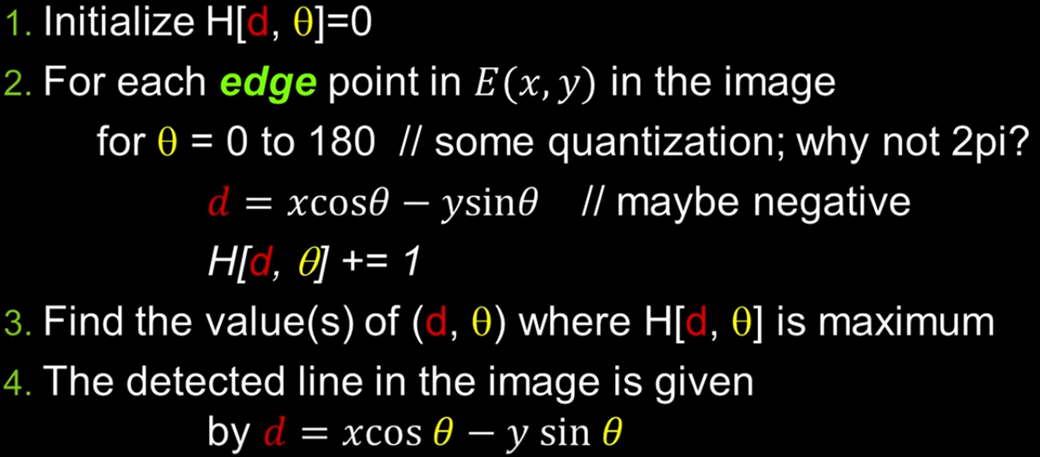

In [111]:
#final hough_transform
import numpy as np
def hough_transform(img_bin):
    nR,nC = img_bin.shape
    thetas = np.deg2rad(np.arange(0.0, 180.0))
    D = np.sqrt((nR - 1)**2 + (nC - 1)**2)
    q = np.ceil(D)
    nrho = 2*q + 1
    rhos = np.linspace(-q, q, nrho)
    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    H = np.zeros((len(rhos), len(thetas)))
    for rowIdx in range(nR):
        for colIdx in range(nC):
            if img_bin[rowIdx, colIdx]:
                for thIdx in range(len(thetas)):
                    rhoVal = colIdx*cos_t[thIdx] + rowIdx*sin_t[thIdx]
                    rhoIdx = np.nonzero(np.abs(rhos-rhoVal) == np.min(np.abs(rhos-rhoVal)))[0]
                    H[rhoIdx, thIdx] += 1
    return rhos, thetas, H

In [112]:
import numpy as np
def hough_peaks(H, num_peaks, nhood_size=3):
    indicies = []
    H1 = np.copy(H)
    for i in range(num_peaks):
        idx = np.argmax(H1)
        H1_idx = np.unravel_index(idx, H1.shape) 
        indicies.append(H1_idx)

        idx_y, idx_x = H1_idx
        if (idx_x - (nhood_size/2)) < 0: min_x = 0
        else: min_x = idx_x - (nhood_size/2)
        if ((idx_x + (nhood_size/2) + 1) > H.shape[1]): max_x = H.shape[1]
        else: max_x = idx_x + (nhood_size/2) + 1

        if (idx_y - (nhood_size/2)) < 0: min_y = 0
        else: min_y = idx_y - (nhood_size/2)
        if ((idx_y + (nhood_size/2) + 1) > H.shape[0]): max_y = H.shape[0]
        else: max_y = idx_y + (nhood_size/2) + 1

        for x in range(int(min_x), int(max_x)):
            for y in range(int(min_y), int(max_y)):
                H1[y, x] = 0
                if (x == min_x or x == (max_x - 1)):
                    H[y, x] = 255
                if (y == min_y or y == (max_y - 1)):
                    H[y, x] = 255
                    
    return indicies, H

C:\Users\Nurzhaussyn\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


  case  0
222.0 1.57079632679
222.0 1.35935794705e-14
222 -1000
221 1000
  case  1
233.0 1.57079632679
233.0 1.42671352101e-14
233 -1000
232 1000
  case  2
107.0 1.57079632679
107.0 6.55186037544e-15
107 -1000
106 1000
  case  3
51.0 0.0
0.0 51.0
1000 51
-1000 51
  case  4
194.0 0.0
0.0 194.0
1000 194
-1000 194
  case  5
118.0 1.57079632679
118.0 7.22541611497e-15
118 -1000
117 1000
  case  6
63.0 0.0
0.0 63.0
1000 63
-1000 63
  case  7
183.0 0.0
0.0 183.0
1000 183
-1000 183
  case  8
245.0 1.57079632679
245.0 1.50019232896e-14
245 -1000
244 1000
  case  9
7.0 1.57079632679
7.0 4.28626379702e-16
7 -1000
6 1000


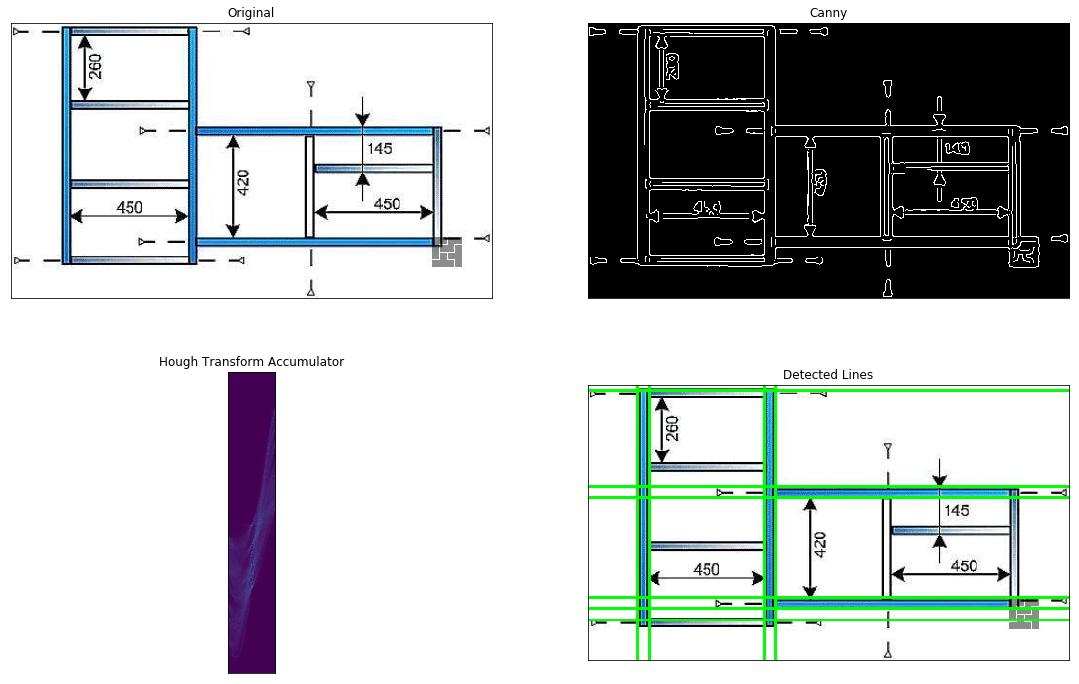

In [114]:
#final hough_transform
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import feature
from scipy import ndimage as nimg
import matplotlib.image as img
from skimage.io import imread
from skimage import color
import sys
import math
import pdb

img_orig = cv2.imread('image.jpg')
img1 = img_orig[:,:,::-1]
bw = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_g = color.rgb2gray(bw)
img = img_orig.copy()
edges = feature.canny(img_g, sigma=2)

rhos, thetas, H = hough_transform(edges)

indicies, H = hough_peaks(H, 10, 11) 

fig = plt.figure(figsize=(15, 10))
fig.canvas.set_window_title('Hough Accumulator Plot')
plt.imshow(H, cmap='jet')
plt.xlabel('Theta Direction'), plt.ylabel('Rho Direction')
plt.tight_layout()
for i in range(len(indicies)):
    rho = rhos[indicies[i][0]]
    theta = thetas[indicies[i][1]]
    print('  case ', i)
    print(rho, theta)
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    print(y0, x0)
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    print(y1,x1)
    print(y2,x2)
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    
#print(indicies)
#'''
plt.subplot(221), plt.imshow(img_orig)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(222), plt.imshow(edges, cmap='gray')
plt.title('Canny'), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.imshow(H)
plt.title('Hough Transform Accumulator'), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.imshow(img)
plt.title('Detected Lines'), plt.xticks([]), plt.yticks([])
plt.show()
#'''